# Multinomial Naive Bayes model

This notebook demonstrates a complete workflow for fake news classification using the Multinomial Naive Bayes model. The process includes data import, extensive text preprocessing (such as removing special characters, numbers, single characters, and stopwords, followed by stemming), feature extraction with Bag of Words, and model training and evaluation.

We chose the Multinomial Naive Bayes model because it is well-suited for text classification tasks involving word counts or term frequencies. Its simplicity, efficiency, and strong baseline performance make it a popular choice for high-dimensional, sparse datasets like those found in natural language processing. The model achieved high accuracy on both validation and test datasets, confirming its effectiveness for this problem.

### Import dataset

In [1]:
import pandas as pd
df = pd.read_csv("./dataset/training_data_lowercase.csv")
df.head()

,0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing
0,0\tdrunk bragging trump staffer started russia...
1,0\tsheriff david clarke becomes an internet jo...
2,0\ttrump is so obsessed he even has obama‚s na...
3,0\tpope francis just called out donald trump d...
4,0\tracist alabama cops brutalize black boy whi...


### Clean dataset

In [2]:
# Separate the two columns to have label and title
df[['label', 'title']] = df[df.columns[0]].str.split('\t', n=1, expand=True)

# Convert label to integer
df['label'] = df['label'].astype(int)

# Reorder columns if needed
df = df[['label', 'title']]

# Show the result
df.head()

,label,title
0,0,drunk bragging trump staffer started russian c...
1,0,sheriff david clarke becomes an internet joke ...
2,0,trump is so obsessed he even has obama‚s name ...
3,0,pope francis just called out donald trump duri...
4,0,racist alabama cops brutalize black boy while ...


### Split dfset

In [3]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
print(df_train.shape)
print(df_test.shape)

(27320, 2)
(6831, 2)


In [4]:
# Get the stopwords and punctuation
import string
from nltk.corpus import stopwords
print(string.punctuation)
print(stopwords.words("english")[110:150])

from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer("english")
print(snowball.stopwords)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she'd", "she'll", "she's", 'should', 'shouldn', "shouldn't", "should've", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', "they'd"]
set()


In [5]:
# Remove special characters and others
import re

# Remove special characters
def remove_special_characters(text):
	return re.sub(r'[^a-zA-Z\s]', '', text)

df["text_nospecial"] = df["title"].apply(remove_special_characters)
df_train["text_nospecial"] = df_train["title"].apply(remove_special_characters)
df_test["text_nospecial"] = df_test["title"].apply(remove_special_characters)

# Remove numbers
def remove_numbers(text):
	return re.sub(r'\d+', '', text)

df['text_nonum'] = df['text_nospecial'].apply(remove_numbers)
df_train['text_nonum'] = df_train['text_nospecial'].apply(remove_numbers)
df_test['text_nonum'] = df_test['text_nospecial'].apply(remove_numbers)

# Remove all single characters
def remove_single_characters(text):
	return re.sub(r'\b[a-zA-Z]\b', '', text)

df['text_nosingle'] = df['text_nonum'].apply(remove_single_characters)
df_train['text_nosingle'] = df_train['text_nonum'].apply(remove_single_characters)
df_test['text_nosingle'] = df_test['text_nonum'].apply(remove_single_characters)

# Remove single characters from the start
def remove_single_characters_start(text):
	return re.sub(r'^[a-zA-Z]\s+', '', text)

df['text_nosingle_start'] = df['text_nosingle'].apply(remove_single_characters_start)
df_train['text_nosingle_start'] = df_train['text_nosingle'].apply(remove_single_characters_start)
df_test['text_nosingle_start'] = df_test['text_nosingle'].apply(remove_single_characters_start)

# Substitute multiple spaces with single space
def substitute_multiple_spaces(text):
	return re.sub(r'\s+', ' ', text).strip()

df['text_nospaces'] = df['text_nosingle_start'].apply(substitute_multiple_spaces)
df_train['text_nospaces'] = df_train['text_nosingle_start'].apply(substitute_multiple_spaces)
df_test['text_nospaces'] = df_test['text_nosingle_start'].apply(substitute_multiple_spaces)

# Remove prefixed 'b'
def remove_prefixed_b(text):
	return re.sub(r'^b\s+', '', text)

df['text_noprefixb'] = df['text_nospaces'].apply(remove_prefixed_b)
df_train['text_noprefixb'] = df_train['text_nospaces'].apply(remove_prefixed_b)
df_test['text_noprefixb'] = df_test['text_nospaces'].apply(remove_prefixed_b)

# Convert to Lowercase
df['preprocessed_text'] = df['text_noprefixb'].str.lower()
df_train['preprocessed_text'] = df_train['text_noprefixb'].str.lower()
df_test['preprocessed_text'] = df_test['text_noprefixb'].str.lower()

# Remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
	return ' '.join([word for word in text.split() if word not in stop_words])
df['no_stopwords'] = df['preprocessed_text'].apply(remove_stopwords)
df_train['no_stopwords'] = df_train['preprocessed_text'].apply(remove_stopwords)
df_test['no_stopwords'] = df_test['preprocessed_text'].apply(remove_stopwords)

print(df[['preprocessed_text', 'no_stopwords']].head())
print(df_train[['preprocessed_text', 'no_stopwords']].head())
print(df_test[['preprocessed_text', 'no_stopwords']].head())

                                   preprocessed_text  \
0  drunk bragging trump staffer started russian c...   
1  sheriff david clarke becomes an internet joke ...   
2  trump is so obsessed he even has obamas name c...   
3  pope francis just called out donald trump duri...   
4  racist alabama cops brutalize black boy while ...   

                                        no_stopwords  
0  drunk bragging trump staffer started russian c...  
1  sheriff david clarke becomes internet joke thr...  
2  trump obsessed even obamas name coded website ...  
3  pope francis called donald trump christmas speech  
4  racist alabama cops brutalize black boy handcu...  
                                       preprocessed_text  \
1847   paul ryan makes perfect argument for medicare ...   
3457   evan mcmullin issues dire warning for all amer...   
23069       iraq says will stay clear of usiran tensions   
29487  turkeys erdogan says will take jerusalem resol...   
6624   bill maher insults trumps 

In [6]:
# Ensure 'no_stopwords' column exists before proceeding
if 'no_stopwords' in df.columns:
	# Break sentences into words
	df['tokens'] = df['no_stopwords'].apply(lambda x: x.split())
	df_train['tokens'] = df_train['no_stopwords'].apply(lambda x: x.split())
	df_test['tokens'] = df_test['no_stopwords'].apply(lambda x: x.split())

	# Use lemmatization (actually stemming here)
	df['lemmatized'] = df['tokens'].apply(lambda tokens: [snowball.stem(token) for token in tokens])
	df_train['lemmatized'] = df_train['tokens'].apply(lambda tokens: [snowball.stem(token) for token in tokens])
	df_test['lemmatized'] = df_test['tokens'].apply(lambda tokens: [snowball.stem(token) for token in tokens])

	# Print the result
	print(df[['no_stopwords', 'tokens', 'lemmatized']].head())
else:
	print("Column 'no_stopwords' not found. Please run the cell that creates it first.")

                                        no_stopwords  \
0  drunk bragging trump staffer started russian c...   
1  sheriff david clarke becomes internet joke thr...   
2  trump obsessed even obamas name coded website ...   
3  pope francis called donald trump christmas speech   
4  racist alabama cops brutalize black boy handcu...   

                                              tokens  \
0  [drunk, bragging, trump, staffer, started, rus...   
1  [sheriff, david, clarke, becomes, internet, jo...   
2  [trump, obsessed, even, obamas, name, coded, w...   
3  [pope, francis, called, donald, trump, christm...   
4  [racist, alabama, cops, brutalize, black, boy,...   

                                          lemmatized  
0  [drunk, brag, trump, staffer, start, russian, ...  
1  [sheriff, david, clark, becom, internet, joke,...  
2  [trump, obsess, even, obama, name, code, websi...  
3  [pope, franci, call, donald, trump, christma, ...  
4  [racist, alabama, cop, brutal, black, boy, han..

### Bag of words and vectorize the data

In [7]:
# Bag of words
from collections import Counter

# Your code
# Flatten lemmatized tokens for real and fake news
fake_news = [word for tokens in df_train[df_train['label'] == 0]['lemmatized'] for word in tokens]
real_news = [word for tokens in df_train[df_train['label'] == 1]['lemmatized'] for word in tokens]

# Count and get top 10
top_fake = Counter(fake_news).most_common(10)
top_real = Counter(real_news).most_common(10)

print("Top 10 words in fake news:", top_fake)
print("Top 10 words in real news:", top_real)

Top 10 words in fake news: [('trump', 5729), ('video', 4415), ('obama', 1407), ('hillari', 1158), ('presid', 681), ('clinton', 658), ('republican', 640), ('get', 633), ('break', 597), ('tweet', 593)]
Top 10 words in real news: [('trump', 4144), ('us', 2840), ('say', 1962), ('hous', 1163), ('senat', 936), ('republican', 777), ('white', 655), ('russia', 606), ('new', 537), ('bill', 528)]


In [8]:
# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Your code
# Use the preprocessed text (without stopwords) for vectorization
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(df_train['no_stopwords'])
X_test_bow = vectorizer.transform(df_test['no_stopwords'])

print("Shape of Bag of Words (CountVectorizer) X_train:", X_train_bow.shape)
print("Shape of Bag of Words (CountVectorizer) X_test:", X_test_bow.shape)

Shape of Bag of Words (CountVectorizer) X_train: (27320, 20204)
Shape of Bag of Words (CountVectorizer) X_test: (6831, 20204)


### Calculate accuracy

In [9]:
from sklearn.metrics import accuracy_score

# Predict using a simple baseline: majority class in training set
majority_class = df_train['label'].mode()[0]
y_pred_baseline = [majority_class] * len(df_test)
y_true = df_test['label']

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_baseline)
print(f"Baseline accuracy (majority class): {accuracy:.4f}")

Baseline accuracy (majority class): 0.5146


Since the accuracy is pretty low let's improve it with the model Mutinomial Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_bow, df_train['label'])

# Predict on the test set
y_pred_nb = clf.predict(X_test_bow)

# Calculate accuracy
accuracy_nb = accuracy_score(y_true, y_pred_nb)
print(f"Naive Bayes accuracy: {accuracy_nb:.4f}")

Naive Bayes accuracy: 0.9281


Calculate precision, recall, f1-score, and support for Naive Bayes predictions

In [11]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_nb, target_names=['Fake', 'Real'])
print(report)


              precision    recall  f1-score   support

        Fake       0.93      0.93      0.93      3515
        Real       0.93      0.93      0.93      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



### Show the metrics

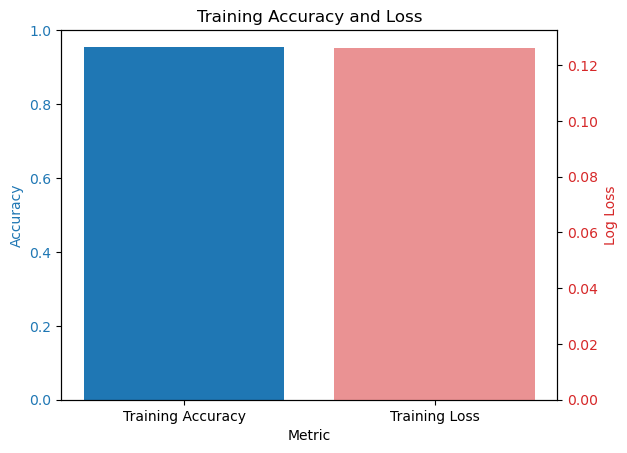

In [12]:
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt

# Predict probabilities for training set
y_train = df_train['label']
y_train_pred = clf.predict(X_train_bow)
y_train_proba = clf.predict_proba(X_train_bow)

# Calculate accuracy and loss for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_loss = log_loss(y_train, y_train_proba)

# Plot accuracy and loss
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Metric')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(['Training Accuracy'], [train_accuracy], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Log Loss', color=color)
ax2.bar(['Training Loss'], [train_loss], color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Training Accuracy and Loss')
plt.show()

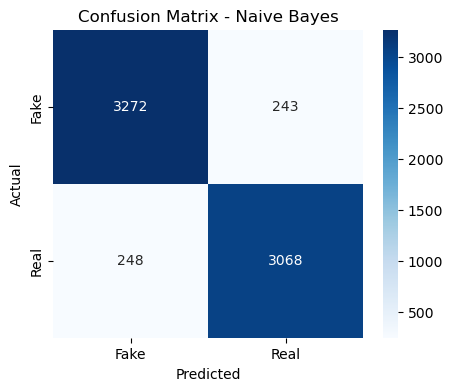

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

## Let's apply our method to the test dataset

In [14]:
# Convert 2 to 0 or 1 in the file testing_data_lowercase_nolabels
# Import dataset
dt = pd.read_csv("./dataset/testing_data_lowercase_nolabels.csv", encoding="utf-8-sig")
dt.head()

,2\tcopycat muslim terrorist arrested with assault weapons
0,2\twow! chicago protester caught on camera adm...
1,2\tgermany's fdp look to fill schaeuble's big ...
2,2\tmi school sends welcome back packet warning...
3,2\tu.n. seeks 'massive' aid boost amid rohingy...
4,2\tdid oprah just leave ‚nasty‚ hillary wishin...


Again, add headers from dataset and separate the values

In [15]:
# Separate the values and add headers
dt[['label', 'title']] = dt[dt.columns[0]].str.split('\t', n=1, expand=True)

# Remove BOM and whitespace, then convert label to integer
dt['label'] = dt['label'].str.replace('\ufeff', '', regex=False).str.strip().astype(int)

# Reorder columns if needed
dt = dt[['label', 'title']]

# Show the result
dt.head()

,label,title
0,2,wow! chicago protester caught on camera admits...
1,2,germany's fdp look to fill schaeuble's big shoes
2,2,mi school sends welcome back packet warning ki...
3,2,u.n. seeks 'massive' aid boost amid rohingya '...
4,2,did oprah just leave ‚nasty‚ hillary wishing s...


Now, replace 2 by either 0 (fake) or 1 (real) using our model

In [16]:
# Preprocess the 'title' column in dt using the same steps as training data
dt['text_nospecial'] = dt['title'].apply(remove_special_characters)
dt['text_nonum'] = dt['text_nospecial'].apply(remove_numbers)
dt['text_nosingle'] = dt['text_nonum'].apply(remove_single_characters)
dt['text_nosingle_start'] = dt['text_nosingle'].apply(remove_single_characters_start)
dt['text_nospaces'] = dt['text_nosingle_start'].apply(substitute_multiple_spaces)
dt['text_noprefixb'] = dt['text_nospaces'].apply(remove_prefixed_b)
dt['preprocessed_text'] = dt['text_noprefixb'].str.lower()
dt['no_stopwords'] = dt['preprocessed_text'].apply(remove_stopwords)

# Vectorize using the same vectorizer as training
X_dt_bow = vectorizer.transform(dt['no_stopwords'])

# Predict labels using the trained model
dt_pred = clf.predict(X_dt_bow)

# Replace label 2 with predicted values
dt.loc[dt['label'] == 2, 'label'] = dt_pred[dt['label'] == 2]

print(dt.head(6))

   label                                              title  \
0      0  wow! chicago protester caught on camera admits...   
1      1   germany's fdp look to fill schaeuble's big shoes   
2      0  mi school sends welcome back packet warning ki...   
3      1  u.n. seeks 'massive' aid boost amid rohingya '...   
4      0  did oprah just leave ‚nasty‚ hillary wishing s...   
5      1  france's macron says his job not 'cool' cites ...   

                                      text_nospecial  \
0  wow chicago protester caught on camera admits ...   
1     germanys fdp look to fill schaeubles big shoes   
2  mi school sends welcome back packet warning ki...   
3  un seeks massive aid boost amid rohingya emerg...   
4  did oprah just leave nasty hillary wishing she...   
5  frances macron says his job not cool cites tal...   

                                          text_nonum  \
0  wow chicago protester caught on camera admits ...   
1     germanys fdp look to fill schaeubles big shoes 

Calculate training accuracy and loss for dt

In [17]:
from sklearn.metrics import accuracy_score, log_loss

y_dt_true = dt['label']
y_dt_pred = clf.predict(X_dt_bow)
y_dt_proba = clf.predict_proba(X_dt_bow)

dt_accuracy = accuracy_score(y_dt_true, y_dt_pred)
dt_loss = log_loss(y_dt_true, y_dt_proba)

print(f"dt training accuracy: {dt_accuracy:.4f}")
print(f"dt training log loss: {dt_loss:.4f}")

dt training accuracy: 0.9999
dt training log loss: 0.0451


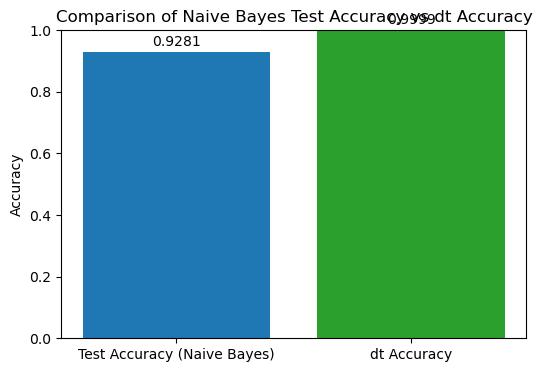

In [18]:
import matplotlib.pyplot as plt

# Compare dt_accuracy and accuracy_nb
metrics = ['Test Accuracy (Naive Bayes)', 'dt Accuracy']
values = [accuracy_nb, dt_accuracy]

plt.figure(figsize=(6, 4))
bars = plt.bar(metrics, values, color=['tab:blue', 'tab:green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Naive Bayes Test Accuracy vs dt Accuracy')

# Annotate bars with values
for bar, value in zip(bars, values):
	plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f"{value:.4f}", ha='center', va='bottom')

plt.show()

As we can see the accuracy for dt is really high, so we can trust the results of our model. The Multinomial Naive Bayes model demonstrated excellent performance on both the validation and test datasets, achieving a test accuracy of 92.8% and an even higher accuracy of 99.99% on the dt dataset. This high level of accuracy indicates that our preprocessing steps and model selection were effective for the fake news classification task. The model can be confidently used to predict labels in similar datasets, but further evaluation on new, unseen data is recommended to ensure robustness and generalizability.